#*goal* - linear regression to predict future charges


In [1]:
import pandas as pd

# Replace 'filename.csv' with the actual name of your CSV file
data = pd.read_csv('/content/drive/MyDrive/insurance.csv')

# Display the first few rows of the dataframe
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
df = pd.DataFrame(data)

['southwest' 'southeast' 'northwest' 'northeast']


Know your data

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


The data looks tidy with no null values. It has some categorical and some numerical features.

Know inner division of your variables


In [ ]:
unique_values = df['region'].unique()
print(unique_values) 

So we have 4 regions

In [5]:
sex_ratio = data['sex'].value_counts(normalize=True)

# Display the ratio
print(sex_ratio)

male      0.505232
female    0.494768
Name: sex, dtype: float64


This is balanced data-set in terms of sex.

In [6]:
smoker_ratio = data['smoker'].value_counts(normalize=True)

# Display the ratio
print(smoker_ratio)

no     0.795217
yes    0.204783
Name: smoker, dtype: float64


Non somkers in dataset are more insured - 80:20

Text(0.5, 1.0, 'Histogram of Ages')

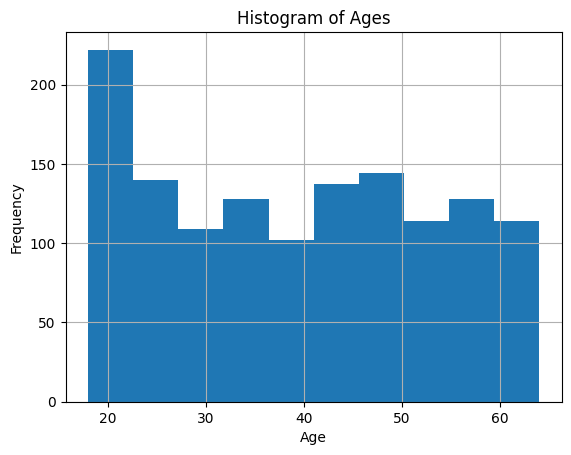

In [8]:
import matplotlib.pyplot as plt

data['age'].hist(bins=10)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Ages')

Relationship of age with charges

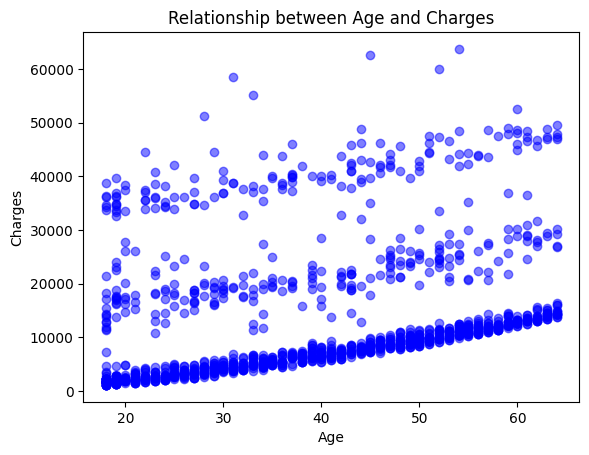

In [38]:
# Create a scatter plot
plt.scatter(df['age'], df['charges'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')

# Display the plot
plt.show()

Relationship between Number of Children and Charges

In [39]:
import seaborn as sns

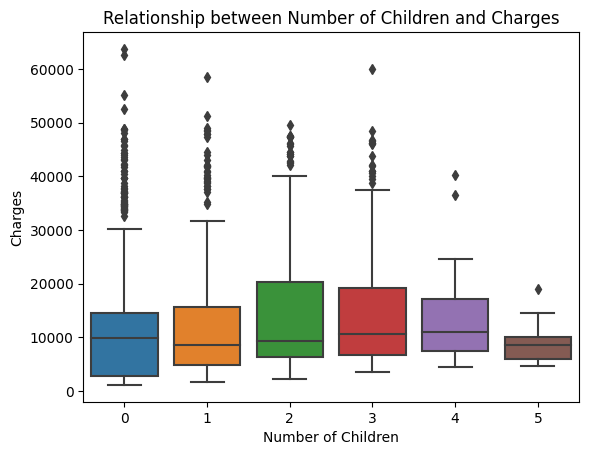

In [40]:
# Create a box plot
sns.boxplot(x='children', y='charges', data=df)

# Add labels and title
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.title('Relationship between Number of Children and Charges')

# Display the plot
plt.show()

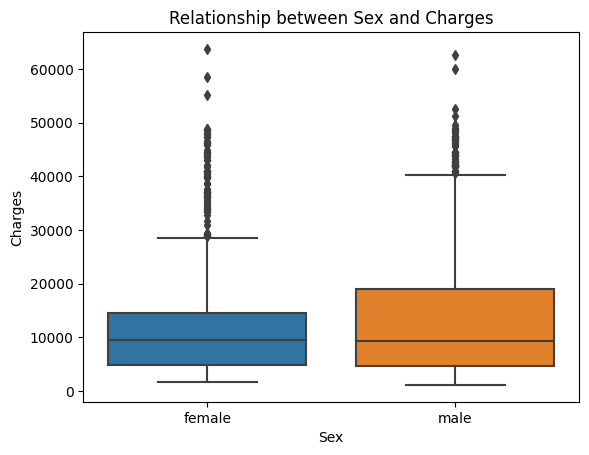

In [41]:
# Create a box plot
sns.boxplot(x='sex', y='charges', data=df)

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.title('Relationship between Sex and Charges')

# Display the plot
plt.show()

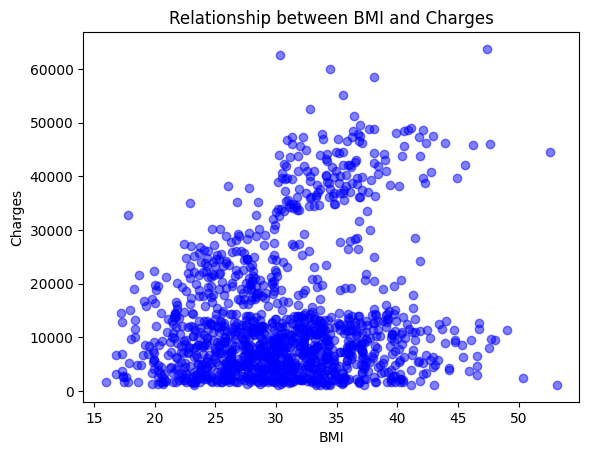

In [42]:
# Create a scatter plot
plt.scatter(df['bmi'], df['charges'], color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')

# Display the plot
plt.show()

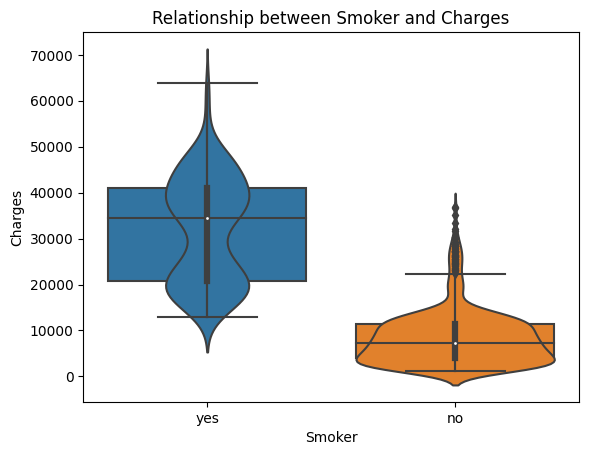

In [44]:
# Create a violin plot
sns.violinplot(x='smoker', y='charges', data=df)
sns.boxplot(x='smoker', y='charges', data=df)
# Add labels and title
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoker and Charges')

# Display the plot
plt.show()

In [45]:
# Calculate the correlation coefficients
correlation = data.corr()['charges'].sort_values(ascending=False)

# Display the correlation coefficients
print(correlation)

charges       1.000000
smoker_yes    0.787251
age           0.299008
bmi           0.198341
children      0.067998
sex_male      0.057292
Name: charges, dtype: float64


<ipython-input-45-c5f1b003e330>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()['charges'].sort_values(ascending=False)


Smokersv highly increases insurance cost.

In [9]:
region_ratio = data['region'].value_counts(normalize=True)

# Display the ratio
print(region_ratio)

southeast    0.272048
southwest    0.242900
northwest    0.242900
northeast    0.242152
Name: region, dtype: float64


we have seen our region is proportionately distributed 

In [31]:
if 'smoker_yes' not in df.columns and 'sex_male' not in df.columns:
    # Create dummy variables for 'smoker' and 'sex'
    dummy_vars = pd.get_dummies(df[['smoker', 'sex','region']], prefix=['smoker', 'sex','region'])

    # Concatenate the dummy variables with the original DataFrame
    df = pd.concat([df, dummy_vars], axis=1)

# Drop specific dummy variables if they exist
df = df.drop(['smoker_no', 'sex_female','region_southwest'], axis=1, errors='ignore')

# Display the updated DataFrame
print(df)

      age     sex     bmi  children smoker     region      charges  \
0      19  female  27.900         0    yes  southwest  16884.92400   
1      18    male  33.770         1     no  southeast   1725.55230   
2      28    male  33.000         3     no  southeast   4449.46200   
3      33    male  22.705         0     no  northwest  21984.47061   
4      32    male  28.880         0     no  northwest   3866.85520   
...   ...     ...     ...       ...    ...        ...          ...   
1333   50    male  30.970         3     no  northwest  10600.54830   
1334   18  female  31.920         0     no  northeast   2205.98080   
1335   18  female  36.850         0     no  southeast   1629.83350   
1336   21  female  25.800         0     no  southwest   2007.94500   
1337   61  female  29.070         0    yes  northwest  29141.36030   

      smoker_yes  sex_male  region_northeast  region_northwest  \
0              1         0                 0                 0   
1              0         1 

In [13]:
from sklearn.linear_model import LinearRegression


In [32]:
# Concatenate the encoded features with the numerical 'price' column
data_encoded = df[['age','bmi','children','smoker_yes','sex_male']]

# Separate the features (X) and the target variable (y)
X = data_encoded
y = df['charges']

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [37]:
# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 33979257.05080822
Root Mean Squared Error (RMSE): 5829.17293025419
Mean Absolute Error (MAE): 4213.48479780714
R-squared (R2) Score: 0.7811302113434095


So we found that linear regression is not the right way to predict insurance cost here.